# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.set_option('display.max_columns', 25)

In [4]:
import sys
# sys.path.append(r'D:\Usuarios\Kitty\Documentos\1-Master\TFM')
sys.path.append(r'D:\Programas\GitHub\TFM')

# Load Data

In [5]:
df = pd.read_csv("data/Credit_Card.csv").drop(columns=["Id"])

In [6]:
df

,CreditLimit,Gender,EducationLevel,Marriage,Age,RepaymentStatusSep,RepaymentStatusAug,RepaymentStatusJul,RepaymentStatusJun,RepaymentStatusMay,RepaymentStatusApr,BillAmountSep,BillAmountAug,BillAmountJul,BillAmountJun,BillAmountMay,BillAmountApr,PreviousPaymentSep,PreviousPaymentAug,PreviousPaymentJul,PreviousPaymentJun,PreviousPaymentMay,PreviousPaymentApr,Default
0,20000.0,Female,University,Married,24,Delay 2 Months,Delay 2 Months,Paid Duly,Paid Duly,NaN,NaN,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,Female,University,Single,26,Paid Duly,Delay 2 Months,No Consumption,No Consumption,No Consumption,Delay 2 Months,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,Female,University,Single,34,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,Female,University,Married,37,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,Male,University,Married,57,Paid Duly,No Consumption,Paid Duly,No Consumption,No Consumption,No Consumption,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,Male,High School,Married,39,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,Male,High School,Single,43,Paid Duly,Paid Duly,Paid Duly,Paid Duly,No Consumption,No Consumption,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,Male,University,Single,37,Delay 4 Months,Delay 3 Months,Delay 2 Months,Paid Duly,No Consumption,No Consumption,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,Male,High School,Married,41,Delay 1 Month,Paid Duly,No Consumption,No Consumption,No Consumption,Paid Duly,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


# Parameters

In [7]:
target = "Default"

# Eliminamos categorías outliers

In [8]:
# # Identificar columnas categóricas automáticamente
# categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# # Iterar sobre cada columna categórica
# for col in categorical_columns:
#     # Calcular la frecuencia relativa de cada categoría
#     frecuencia_relativa = df[col].value_counts(normalize=True)
    
#     # Identificar las categorías que representan menos del 1%
#     categorias_validas = frecuencia_relativa[frecuencia_relativa >= 0.01].index
    
#     # Filtrar el DataFrame para conservar solo las categorías válidas
#     df = df[df[col].isin(categorias_validas)]

# # Mostrar el DataFrame resultante
# print("Dataset después de eliminar registros con categorías raras (<1%) en todas las columnas categóricas:")
# print(df)


# Rellenamos NaN con la moda

In [9]:
# Identificar columnas categóricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Rellenar los NaN de las columnas categóricas con la moda
for col in categorical_columns:
    moda = df[col].mode()[0]  # Obtenemos la moda (primer valor si hay múltiples)
    df[col].fillna(moda, inplace=True)

# Mostrar el DataFrame resultante
print("Dataset después de rellenar los NaN con la moda:")
df


Dataset después de rellenar los NaN con la moda:


C:\Users\mario\AppData\Local\Temp\ipykernel_19712\2455475951.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(moda, inplace=True)


,CreditLimit,Gender,EducationLevel,Marriage,Age,RepaymentStatusSep,RepaymentStatusAug,RepaymentStatusJul,RepaymentStatusJun,RepaymentStatusMay,RepaymentStatusApr,BillAmountSep,BillAmountAug,BillAmountJul,BillAmountJun,BillAmountMay,BillAmountApr,PreviousPaymentSep,PreviousPaymentAug,PreviousPaymentJul,PreviousPaymentJun,PreviousPaymentMay,PreviousPaymentApr,Default
0,20000.0,Female,University,Married,24,Delay 2 Months,Delay 2 Months,Paid Duly,Paid Duly,No Consumption,No Consumption,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,Female,University,Single,26,Paid Duly,Delay 2 Months,No Consumption,No Consumption,No Consumption,Delay 2 Months,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,Female,University,Single,34,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,Female,University,Married,37,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,Male,University,Married,57,Paid Duly,No Consumption,Paid Duly,No Consumption,No Consumption,No Consumption,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,Male,High School,Married,39,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,Male,High School,Single,43,Paid Duly,Paid Duly,Paid Duly,Paid Duly,No Consumption,No Consumption,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,Male,University,Single,37,Delay 4 Months,Delay 3 Months,Delay 2 Months,Paid Duly,No Consumption,No Consumption,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,Male,High School,Married,41,Delay 1 Month,Paid Duly,No Consumption,No Consumption,No Consumption,Paid Duly,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


# One-Hot Encoder

In [10]:
# Identificar columnas categóricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Realizar One-Hot Encoding para todas las columnas categóricas
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

# Mostrar el DataFrame resultante
print("Dataset después del One-Hot Encoding:")
df_encoded

Dataset después del One-Hot Encoding:


,CreditLimit,Age,BillAmountSep,BillAmountAug,BillAmountJul,BillAmountJun,BillAmountMay,BillAmountApr,PreviousPaymentSep,PreviousPaymentAug,PreviousPaymentJul,PreviousPaymentJun,...,RepaymentStatusMay_Delay 8 Months,RepaymentStatusMay_No Consumption,RepaymentStatusMay_Paid Duly,RepaymentStatusApr_Delay 2 Months,RepaymentStatusApr_Delay 3 Months,RepaymentStatusApr_Delay 4 Months,RepaymentStatusApr_Delay 5 Months,RepaymentStatusApr_Delay 6 Months,RepaymentStatusApr_Delay 7 Months,RepaymentStatusApr_Delay 8 Months,RepaymentStatusApr_No Consumption,RepaymentStatusApr_Paid Duly
0,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,...,False,True,False,False,False,False,False,False,False,False,True,False
1,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,...,False,True,False,True,False,False,False,False,False,False,False,False
2,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,...,False,True,False,False,False,False,False,False,False,False,True,False
3,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,...,False,True,False,False,False,False,False,False,False,False,True,False
4,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,...,False,True,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,...,False,True,False,False,False,False,False,False,False,False,True,False
29996,150000.0,43,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,...,False,True,False,False,False,False,False,False,False,False,True,False
29997,30000.0,37,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,...,False,True,False,False,False,False,False,False,False,False,True,False
29998,80000.0,41,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,...,False,True,False,False,False,False,False,False,False,False,False,True


In [11]:
vars_numericas = df_encoded.select_dtypes(include=['float', 'int']).columns

# Scale

In [12]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# 1. Cargar el dataset
X = df_encoded[[elem for elem in df_encoded.columns if elem != target]]
y = pd.Series(df_encoded[target], name=target)

# 2. Escalar los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled[-1])
print("\n",X.shape)

[0.04040404 0.43103448 0.1889308  0.11263272 0.11366715 0.19455324
 0.11280261 0.27274648 0.00237879 0.00106872 0.00159591 0.00161031
 0.00234451 0.00189155 0.         1.         0.         0.
 0.         0.         1.         0.         1.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.         0.         0.         0.         0.
 0.         0.         0.         0.         1.         0.        ]

 (30000, 84)


# SMOTE

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Revisar la proporción inicial de clases
print("Distribución original de y_train:")
print(y_train.value_counts())

# Inicializar SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE para generar un conjunto balanceado
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Revisar la nueva distribución de clases
print("\nDistribución después de SMOTE:")
print(y_train_smote.value_counts())

Distribución original de y_train:
Default
0    18691
1     5309
Name: count, dtype: int64

Distribución después de SMOTE:
Default
0    18691
1    18691
Name: count, dtype: int64


# TRAIN

In [ ]:
# 3. Configurar validación cruzada k-fold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 4. Inicializar modelos
models = {
    "Regresión Logística": LogisticRegression(max_iter=1000, random_state=42),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# 5. Configurar los hiperparámetros para cada modelo
param_grids = {
    "Regresión Logística": {
        "C": [0.1, 1, 10],
        "solver": ["lbfgs", "liblinear"],
        "penalty": ["l2"]
    },
    "Árbol de Decisión": {
        "criterion": ["gini", "entropy"],
        "max_depth": [3, 5],
        "min_samples_split": [50, 500]
    },
    "Naive Bayes": {
        "var_smoothing": np.logspace(0, -9, num=5)
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    },
    "Random Forest": {
        "n_estimators": [50, 100],
        "max_depth": [3, 5],
        "min_samples_split": [50, 500]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100],
        "learning_rate": [0.01, 0.1],
        "max_depth": [3, 5]
    }
}

# 6. Diccionario para almacenar los mejores modelos y resultados
best_models = {}
grid_results = []

# 7. Iterar sobre cada modelo y realizar GridSearchCV
for model_name, model in models.items():
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        cv=kfold,
        scoring="accuracy",
        n_jobs=-1
    )
    grid.fit(X_train_smote, y_train_smote)
    best_models[model_name] = grid.best_estimator_
    grid_results.append({
        "Model": model_name,
        "Best Params": grid.best_params_,
        "Best Accuracy": grid.best_score_
    })

# Convertir resultados de hiperparámetros en un DataFrame
grid_results_df = pd.DataFrame(grid_results)
grid_results_df.sort_values(by="Best Accuracy", ascending=False, inplace=True)

# 8. Evaluar los mejores modelos con k-fold
evaluation_summary = []

for model_name, best_model in best_models.items():
    accuracy = cross_val_score(best_model, X_train_smote, y_train_smote, cv=kfold, scoring="accuracy").mean()
    precision = cross_val_score(best_model, X_train_smote, y_train_smote, cv=kfold, scoring="precision_weighted").mean()
    recall = cross_val_score(best_model, X_train_smote, y_train_smote, cv=kfold, scoring="recall_weighted").mean()
    f1 = cross_val_score(best_model, X_train_smote, y_train_smote, cv=kfold, scoring="f1_weighted").mean()
    roc_auc = cross_val_score(best_model, X_train_smote, y_train_smote, cv=kfold, scoring="roc_auc").mean()
    
    evaluation_summary.append({
        "Model": model_name,
        "Mean Accuracy": accuracy,
        "Mean Precision": precision,
        "Mean Recall": recall,
        "Mean F1-Score": f1,
        "Mean ROC - AUC": roc_auc
    })

# Convertir resultados de evaluación en un DataFrame
evaluation_df = pd.DataFrame(evaluation_summary)
evaluation_df.sort_values(by="Mean Accuracy", ascending=False, inplace=True)

# 9. Mostrar resultados finales
print("Resultados de búsqueda de hiperparámetros:")
print(grid_results_df)

print("\nDesempeño de los modelos optimizados:")
print(evaluation_df)

Resultados de búsqueda de hiperparámetros:
                 Model                                        Best Params  \
5    Gradient Boosting  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...   
3  K-Nearest Neighbors  {'metric': 'manhattan', 'n_neighbors': 3, 'wei...   
1    Árbol de Decisión  {'criterion': 'entropy', 'max_depth': 10, 'min...   
4        Random Forest  {'max_depth': 5, 'min_samples_split': 50, 'n_e...   
0  Regresión Logística  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}   
2          Naive Bayes                             {'var_smoothing': 1.0}   

   Best Accuracy  
5       0.831229  
3       0.821358  
1       0.731101  
4       0.720721  
0       0.704162  
2       0.663501  

Desempeño de los modelos optimizados:
                 Model  Mean Accuracy  Mean Precision  Mean Recall  \
5    Gradient Boosting       0.831229        0.836038     0.831229   
3  K-Nearest Neighbors       0.821411        0.829916     0.821411   
1    Árbol de Decisión       0.7311

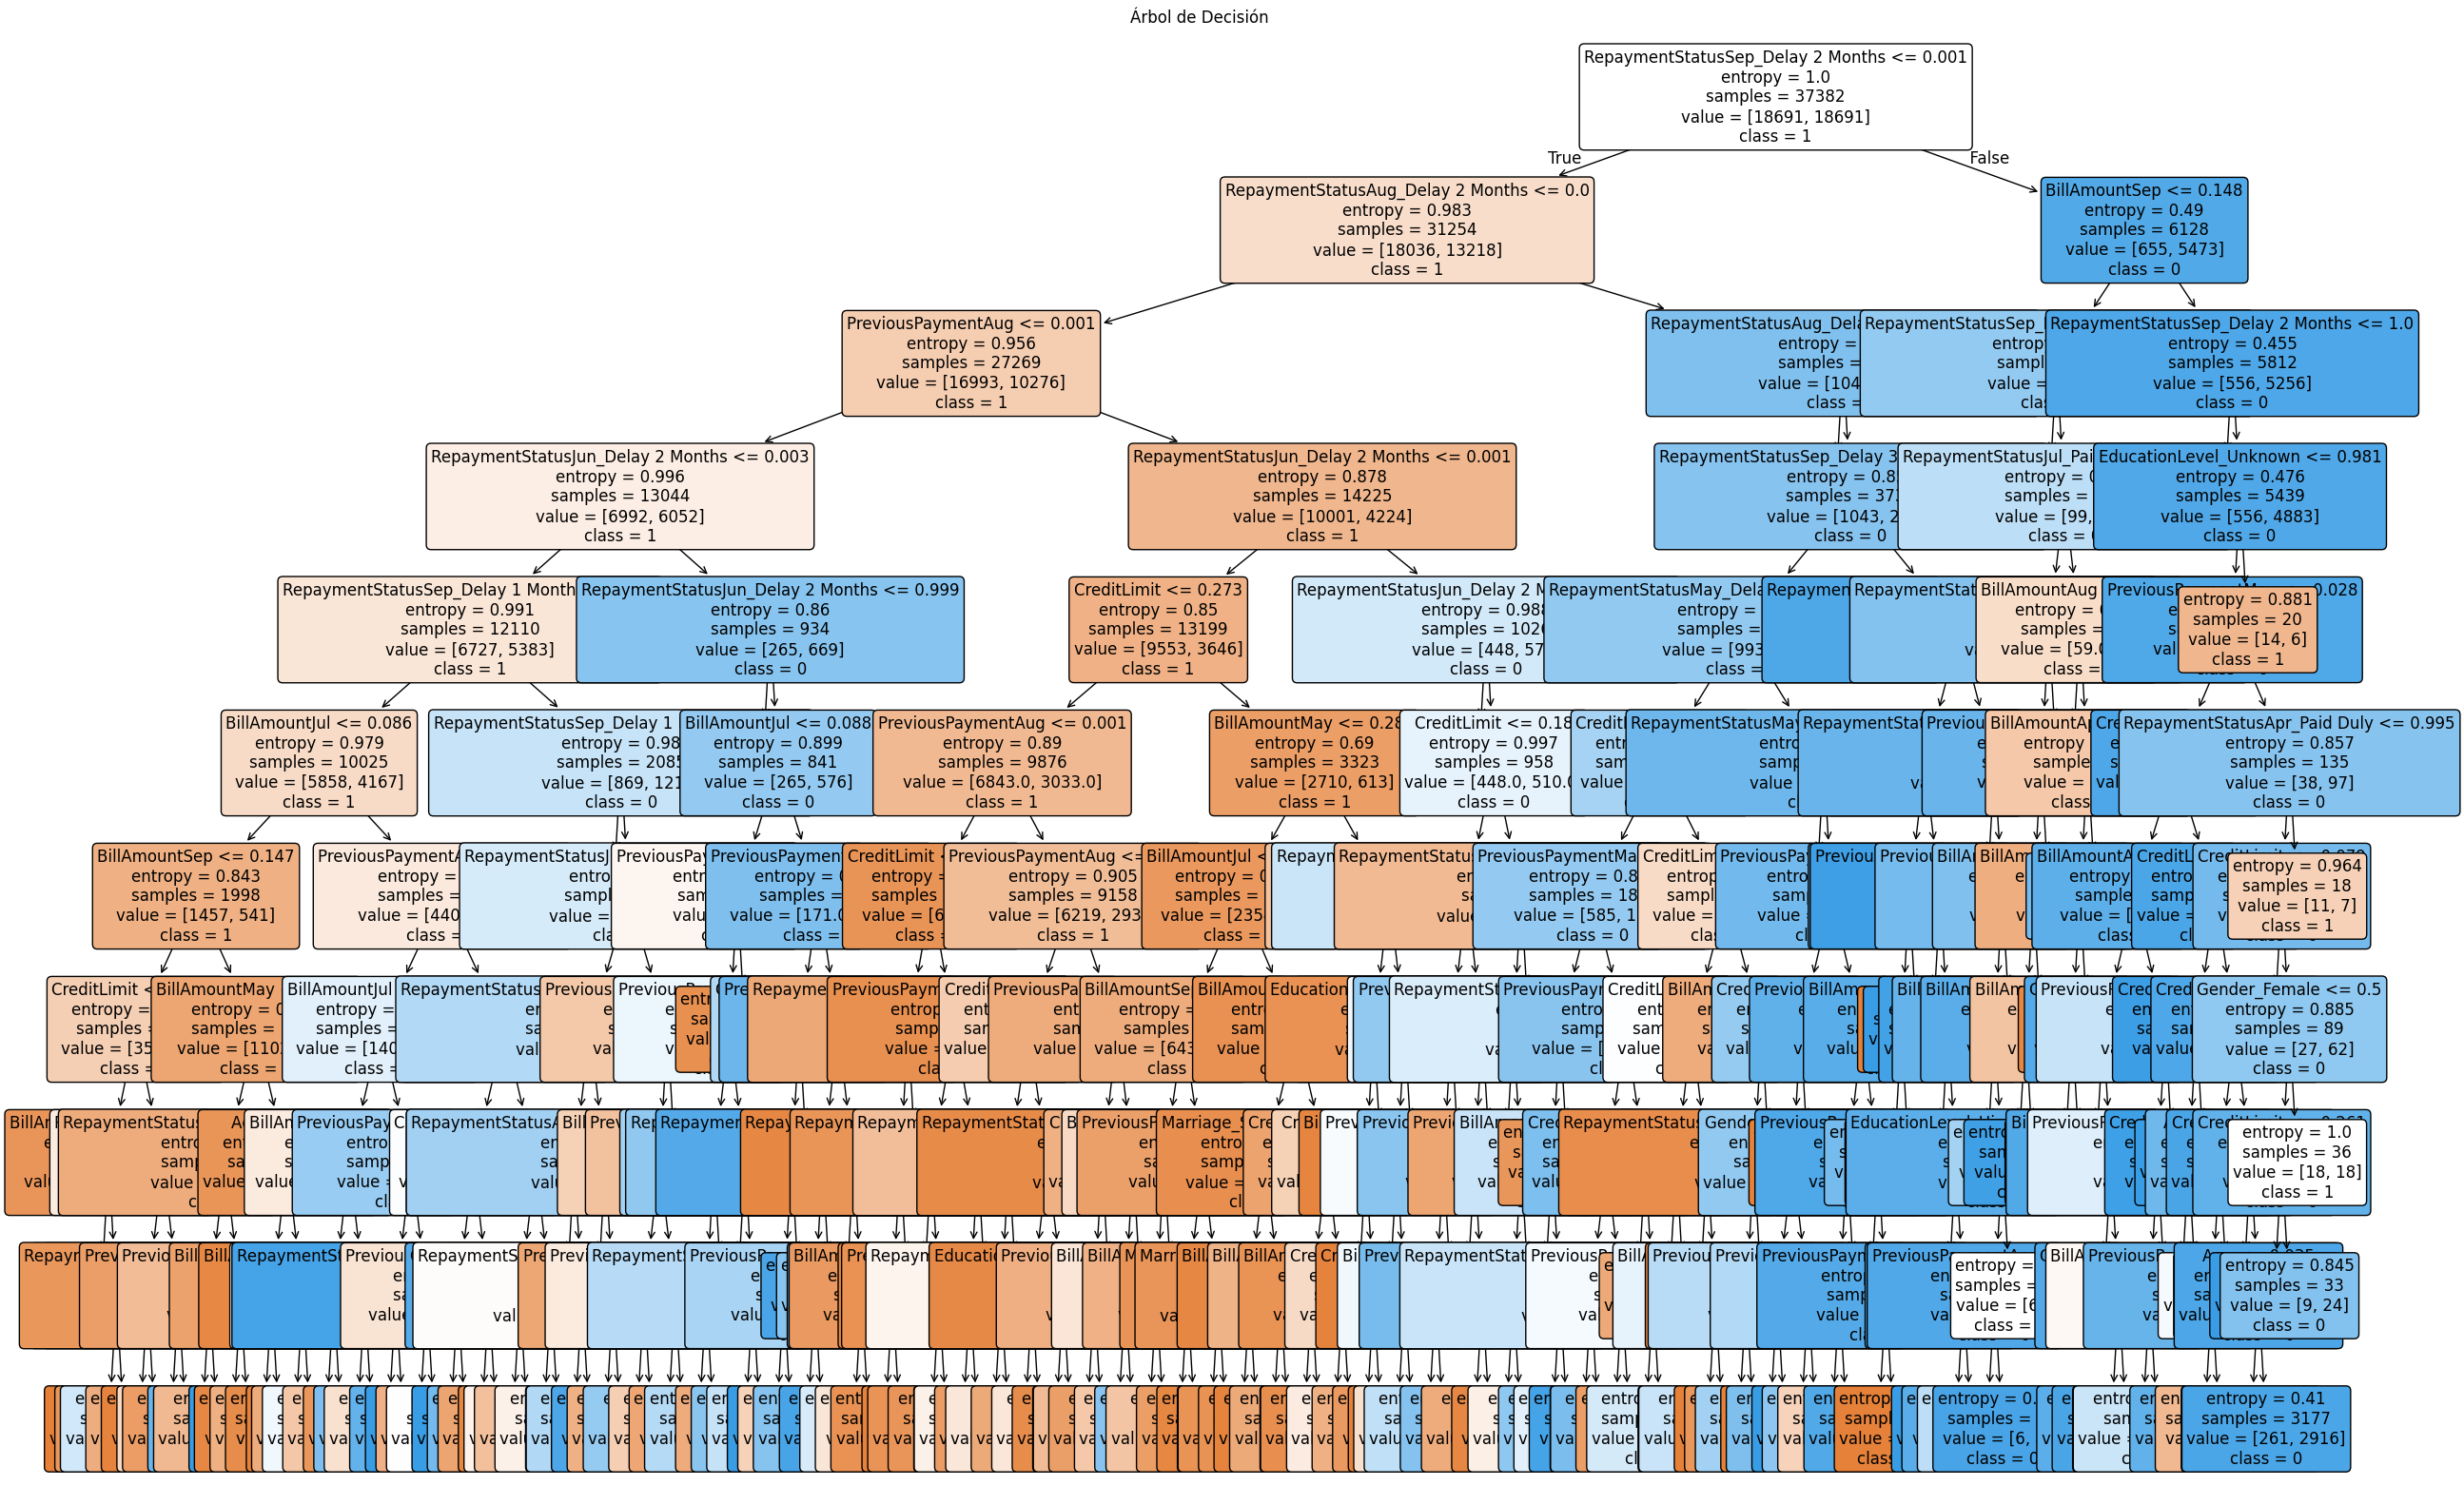

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Árbol de Decisión
decision_tree_model = best_models["Árbol de Decisión"]

# Crear la gráfica
plt.figure(figsize=(30, 20))
plot_tree(
    decision_tree_model,
    feature_names=X.columns,  # Nombres de las características (si es un DataFrame)
    class_names=[str(cls) for cls in y.unique()],  # Nombres de las clases
    filled=True,  # Colorear nodos según la clase predominante
    rounded=True,  # Bordes redondeados
    fontsize=12  # Tamaño de la fuente
)
plt.title("Árbol de Decisión")
plt.show()